In [3]:
# Check GPU type
!nvidia-smi


Tue Dec  9 16:48:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install ultralytics roboflow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 125.7 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# --- Replace with your credentials ---
API_KEY = "McrhzGgUVuaQbO2a1BX6"
PROJECT_NAME = "lunar-scene-analysis-fejkh"
WORKSPACE = "chandai"
VERSION = 5  # your dataset version
# ------------------------------------

rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT_NAME)
dataset = project.version(VERSION).download("yolov8")

dataset.location


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lunar-Scene-Analysis-5 in yolov8:: 100%|██████████| 2484/2484 [00:00<00:00, 7830.65it/s]


'/content/Lunar-Scene-Analysis-5'

In [5]:
yaml_content = """
  train: /content/Lunar-Scene-Analysis-5/train
  val: /content/Lunar-Scene-Analysis-5/valid
  test: /content/Lunar-Scene-Analysis-5/test

  nc: 6

  names:
    - artifact
    - boulder
    - crater
    - rock
    - rocky_region
    - rover path
  """

with open('/content/Lunar-Scene-Analysis-5/dataset.yaml', 'w') as f:
    f.write(yaml_content)

print("dataset.yaml created!")


dataset.yaml created!


In [6]:
# Choose your model
model = YOLO("yolov8l-seg.pt")   # segmentation model

# Train
results = model.train(
    data="/content/Lunar-Scene-Analysis-5/dataset.yaml",
    epochs=100,
    imgsz=640,
    batch=8,
    workers=4,
    optimizer="SGD",
    lr0=0.01,
    lrf=0.1,
    device=0,          # Use GPU
    project="yolov8_seg_results",
    name="train_run",
    close_mosaic=15
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=15, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Lunar-Scene-Analysis-5/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0,

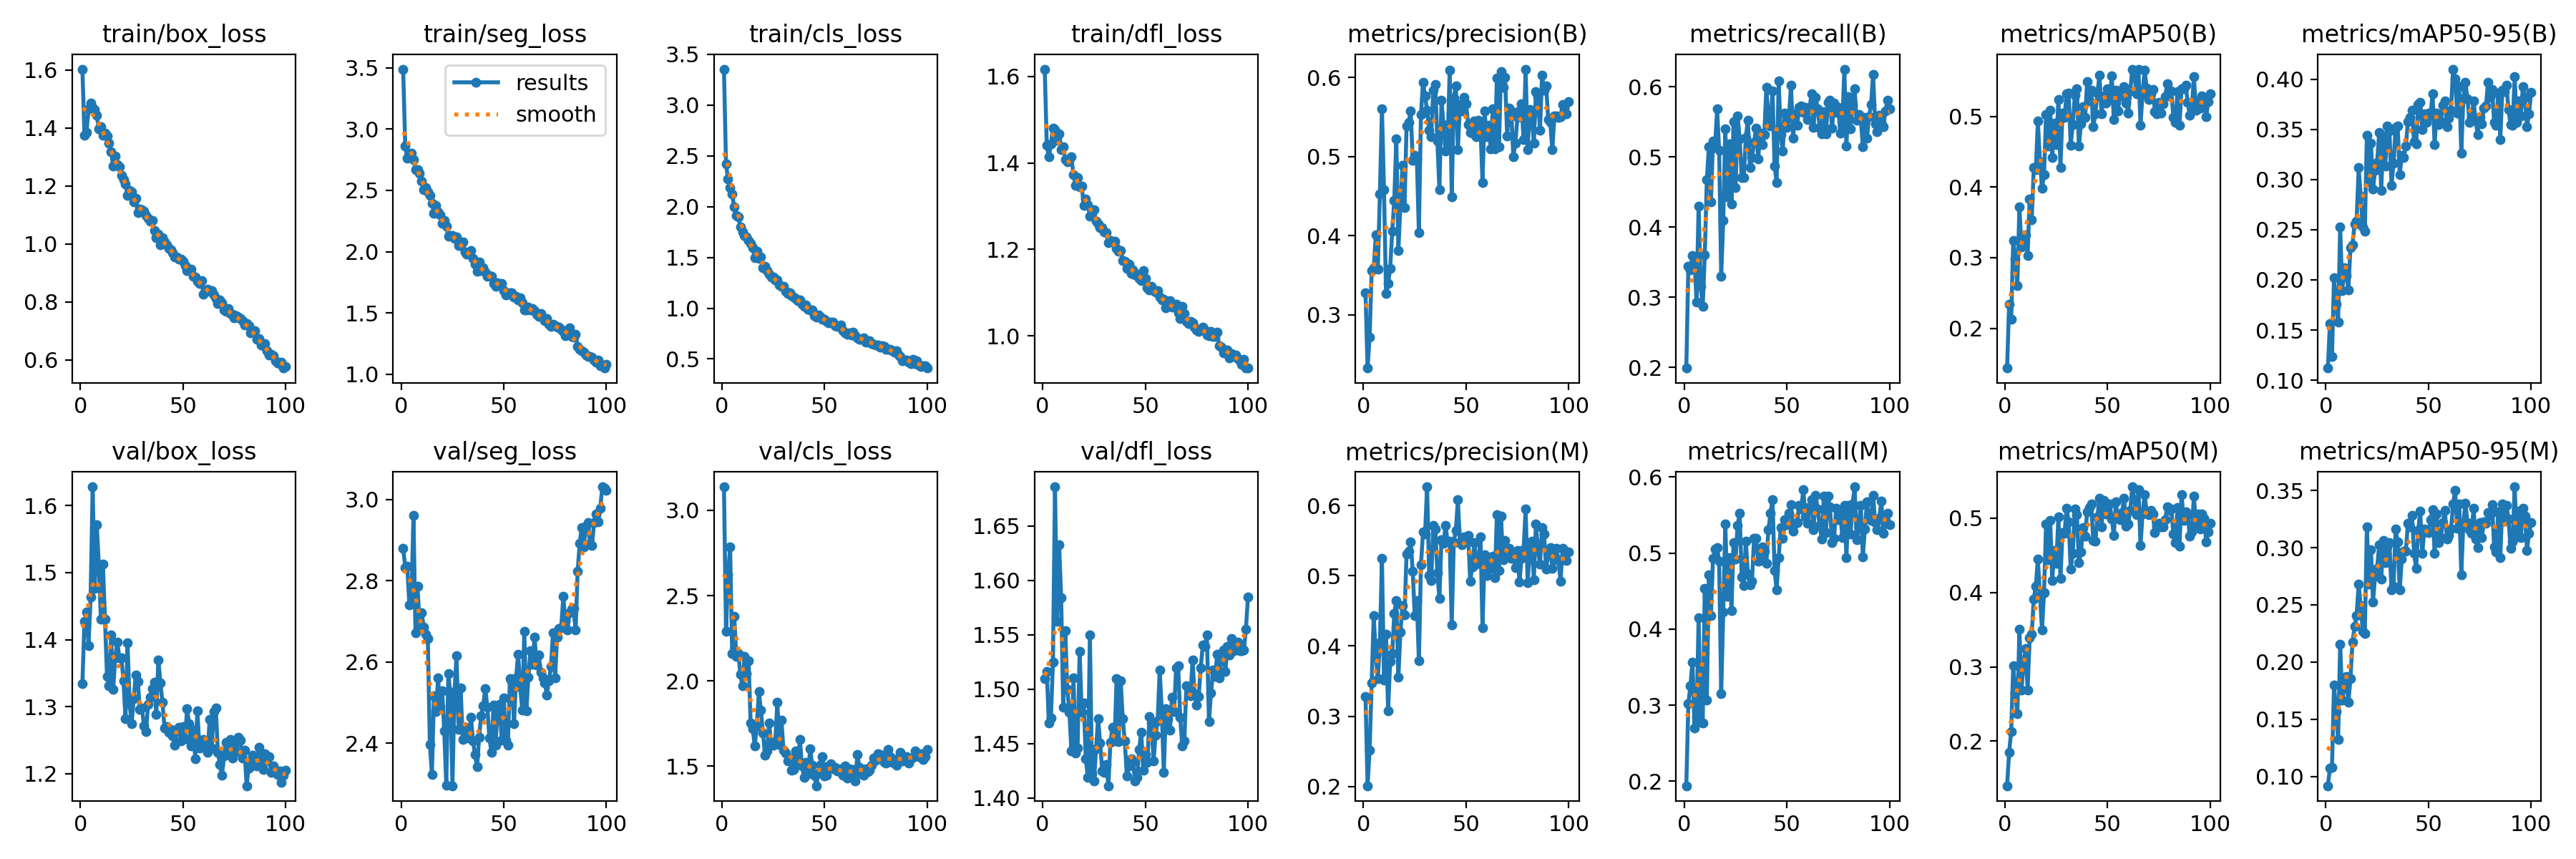

In [7]:
from IPython.display import Image

Image(filename="yolov8_seg_results/train_run/results.png")


In [8]:
metrics = model.val()
metrics


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,916,514 parameters, 0 gradients, 210.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1489.0±582.8 MB/s, size: 40.5 KB)
val: Scanning /content/Lunar-Scene-Analysis-5/valid/labels.cache... 99 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 99/99 154.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.1s/it 7.6s
                   all         99        399       0.51      0.618      0.556      0.404      0.511      0.577      0.528      0.352
              artifact         35         55      0.655      0.865      0.751      0.627      0.649      0.836      0.733      0.577
               boulder          4          5      0.355      0.774      0.626      0.584      0.339      0.722      0.626      0.574
                crater        

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd9072bd700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [9]:
from google.colab import files
uploaded = files.upload()

test_image = list(uploaded.keys())[0]
print("Testing on:", test_image)

results = model.predict(
    test_image,
    save=True,
    imgsz=640,
    conf=0.3
)

results


Saving C3_TCAM_4_2C_112.png to C3_TCAM_4_2C_112.png
Testing on: C3_TCAM_4_2C_112.png

image 1/1 /content/C3_TCAM_4_2C_112.png: 480x640 1 artifact, 1 crater, 9 rocks, 2 rocky_regions, 5 rover paths, 65.3ms
Speed: 2.7ms preprocess, 65.3ms inference, 17.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'artifact', 1: 'boulder', 2: 'crater', 3: 'rock', 4: 'rocky_region', 5: 'rover path'}
 obb: None
 orig_img: array([[[139, 122,  95],
         [144, 132, 128],
         [117, 106, 113],
         ...,
         [ 84,  94, 100],
         [ 98, 102, 113],
         [ 70, 111, 117]],
 
        [[132, 133,  94],
         [149, 145, 132],
         [120, 126, 122],
         ...,
         [ 71,  94, 103],
         [ 66,  95, 105],
         [ 45, 101, 109]],
 
        [[127, 135,  96],
         [128, 138, 123],
         [112, 124, 121],
         ...,
         [ 82, 109, 116],
         [ 84, 114, 122],
         [ 50, 106, 112]],
 
        ...,
 
        [[116, 141,  95],
         [141, 159, 138],
         [114, 136, 127],
         ...,
         [ 78, 121, 131],
         [ 64, 118, 128],
         [ 50, 125, 135]],
 

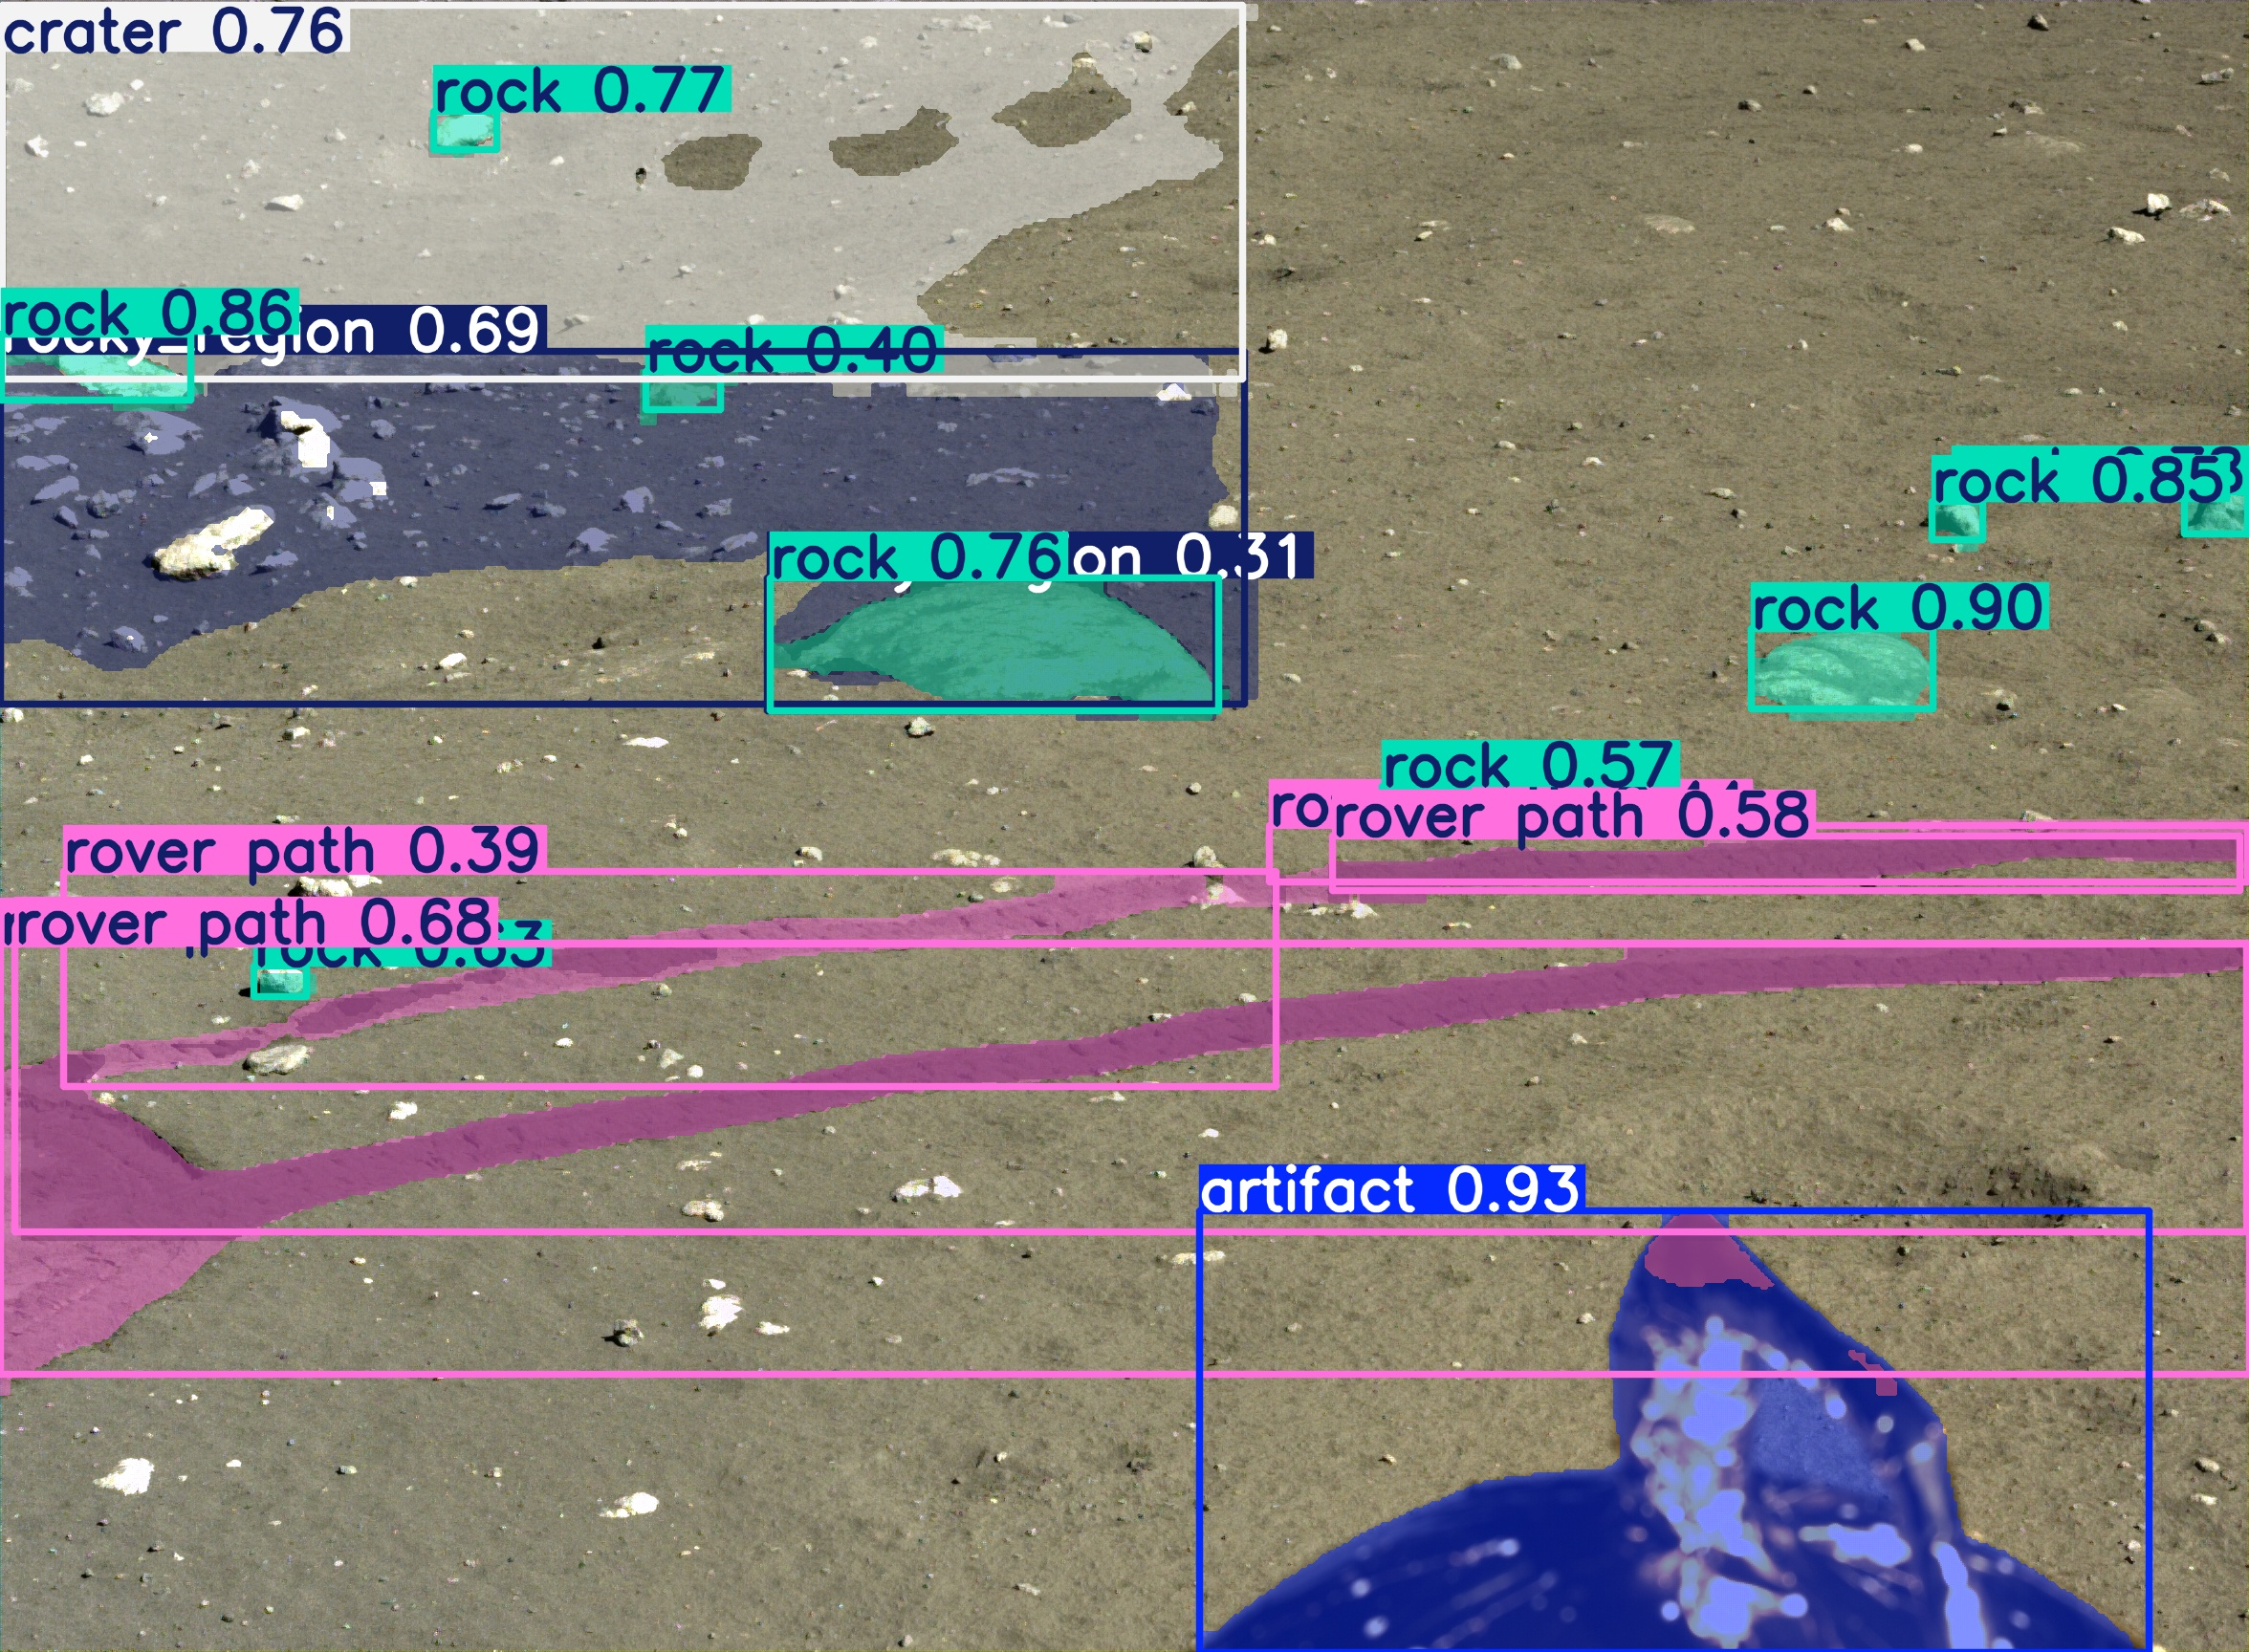

In [12]:
import glob
from IPython.display import Image

output_path = glob.glob("runs/segment/predict/*.jpg")[0]
Image(filename=output_path)


In [11]:
!zip -r yolov8_large_trained_model.zip /content/yolov8_seg_results/train_run
from google.colab import files
files.download("yolov8_large_trained_model.zip")


updating: content/yolov8_seg_results/train_run/ (stored 0%)
updating: content/yolov8_seg_results/train_run/val_batch0_pred.jpg (deflated 9%)
updating: content/yolov8_seg_results/train_run/MaskF1_curve.png (deflated 8%)
updating: content/yolov8_seg_results/train_run/BoxPR_curve.png (deflated 10%)
updating: content/yolov8_seg_results/train_run/confusion_matrix.png (deflated 24%)
updating: content/yolov8_seg_results/train_run/weights/ (stored 0%)
updating: content/yolov8_seg_results/train_run/weights/last.pt (deflated 8%)
updating: content/yolov8_seg_results/train_run/weights/best.pt (deflated 8%)
updating: content/yolov8_seg_results/train_run/MaskR_curve.png (deflated 9%)
updating: content/yolov8_seg_results/train_run/args.yaml (deflated 52%)
updating: content/yolov8_seg_results/train_run/val_batch1_pred.jpg (deflated 6%)
updating: content/yolov8_seg_results/train_run/BoxP_curve.png (deflated 6%)
updating: content/yolov8_seg_results/train_run/train_batch2.jpg (deflated 6%)
updating: cont

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>